# Model of heterologous self-targeting
This Notebook generates the following plots:
* Fig. 1B: dependence of $p_{\text{self}}$ on $k_{\text{fix}}$ and $k_{\text{var}}$
* Fig. 1C: scaling of repertoire size and spacer length
* Fig. S2G: fit to scaling law

## Per-spacer probability of self-targeting

We compute the probability, $p_{\text{self}}$, of a match between a spacer of length $l_t = l_s + l_p$ and a host genome of length $L$. Both sequences are assumed to be random and uncorrelated, and have equal nucleotide usage.

* $l_s$ = spacer length
* $l_p$ = PAM length
* $L$ = host genome length

We consider the following model of cross-reactivity: within a length-$l_t$ alignment between spacer and host genome, up to $k_{\text{fix}}$ mismatches are tolerated at fixed positions, and up to $k_{\text{var}}$ mismatches are tolerated at any other position.

* $k_{\text{fix}}$ = no. of fixed-position mismatches
* $k_{\text{var}}$ = no. of variable-position mismatches

For a given alignment, the matching probability, $p_m$, is
$$\begin{aligned}
p_m(l_t,k_{\text{fix}},k_{\text{var}}) &= 4^{-l_t + k_{\text{fix}}} \sum_{i=0}^{k_{\text{var}}}\binom{l_t - k_{\text{fix}}}{i} 3^{i}\\
&\approx 4^{-l_t + k_{\text{fix}}} \binom{l_t - k_{\text{fix}}}{k_{\text{var}}} 3^{k_{\text{var}}}.
\end{aligned}$$

Then, the probability that there exists an alignment somewhere in the host genome is
$$\begin{aligned}
p_{\text{self}}(L,l_t,k_{\text{fix}},k_{\text{var}}) &= 1 - [1 - p_m(l_t,k_{\text{fix}},k_{\text{var}})]^L\\
&\approx L p_m(l_t,k_{\text{fix}},k_{\text{var}}),
\end{aligned}$$
assuming $p_m \ll 1$.

Below, we define the following functions:

|                           | all terms of sum | largest term of sum |
|---------------------------|:----------------:|:-------------------:|
| not taking $p_m \ll 1$    | `F_self()`       | `p_self1()`         |
| taking $p_m \ll 1$        |                  | `p_self()`          |

In [1]:
using PyPlot
rc(:svg, fonttype=:none)

include("self-targeting.jl")

lin(x;m=0,c=0) = m*x + c # linear function

log10_N_pred(l_t,k_fix,k_var,LvP) = (l_t - k_tot(k_fix,k_var,l_t))*log10(4) - log10(LvP);

## Order-of-magnitude estimate
Approximate numbers for the E. coli type I-E system are used to estimate $p_{\text{self}}$ given certain cross-reactivity parameters.

In [2]:
l_s = 32
l_p = 3
L = 5e6

k_fix = 5
k_var = 5

p_self(L,l_s+l_p,k_fix,k_var),
p_self1(L,l_s+l_p,k_fix,k_var),
F_self(L,l_s+l_p,k_fix,k_var),
p_nn(L,l_s+l_p,k_fix,k_var)

(0.00015017916597803827, 0.00015016803708323145, 0.00016028614910390537, 0.00015016651743826603)

## Fig. 1B: dependence of $p_{\text{self}}$ on $k_{\text{fix}}$ and $k_{\text{var}}$

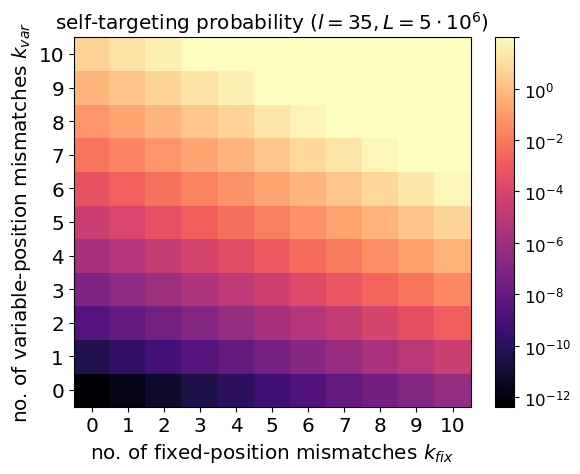

(PyCall.PyObject[PyObject <matplotlib.axis.YTick object at 0x7fc260278810>, PyObject <matplotlib.axis.YTick object at 0x7fc260010f50>, PyObject <matplotlib.axis.YTick object at 0x7fc25ff141d0>, PyObject <matplotlib.axis.YTick object at 0x7fc260a437d0>, PyObject <matplotlib.axis.YTick object at 0x7fc260a6ac10>, PyObject <matplotlib.axis.YTick object at 0x7fc260a75350>, PyObject <matplotlib.axis.YTick object at 0x7fc260a75450>, PyObject <matplotlib.axis.YTick object at 0x7fc260a7c1d0>, PyObject <matplotlib.axis.YTick object at 0x7fc260a7c2d0>, PyObject <matplotlib.axis.YTick object at 0x7fc260a75490>, PyObject <matplotlib.axis.YTick object at 0x7fc260a55990>], PyCall.PyObject[PyObject Text(0, 0, '0'), PyObject Text(0, 1, '1'), PyObject Text(0, 2, '2'), PyObject Text(0, 3, '3'), PyObject Text(0, 4, '4'), PyObject Text(0, 5, '5'), PyObject Text(0, 6, '6'), PyObject Text(0, 7, '7'), PyObject Text(0, 8, '8'), PyObject Text(0, 9, '9'), PyObject Text(0, 10, '10')])

In [3]:
# construct phase diagram in k_fix and k_var space
k_fix_range = collect(0:10)
k_var_range = collect(0:10)

p_self_grid = hcat([[min(1,p_self(L,l_s+l_p,k_fix,k_var)) for k_fix in k_fix_range] for k_var in k_var_range]...)

# plot phase diagram
k_fix_range1 = vcat(k_fix_range.-0.5,10.5)
k_var_range1 = vcat(k_var_range.-0.5,10.5)

pcolor(k_fix_range1,k_var_range1,log10.(p_self_grid)', cmap="magma")

# set colorbar
cbar = colorbar()
cbar.ax.set_yticklabels(["\$10^{-14}\$","\$10^{-12}\$","\$10^{-10}\$","\$10^{-8}\$","\$10^{-6}\$","\$10^{-4}\$","\$10^{-2}\$","\$10^{0}\$"],fontsize="large")

title("self-targeting probability \$(l=$(l_s+l_p), L=5\\cdot10^6)\$", fontsize="x-large")
ylabel("no. of variable-position mismatches \$k_{var}\$", fontsize="x-large")
xlabel("no. of fixed-position mismatches \$k_{fix}\$", fontsize="x-large")

xticks(0:10, fontsize="x-large")
yticks(0:10, fontsize="x-large")

# savefig("phasediagram_k.svg",format="svg")

## Fig. 1C: scaling of repertoire size and spacer length

Again, use approximate numbers for the E. coli type I-E system, except specify a proportional dependence of $k_{\text{fix}}$ on $l_s$.
* $L = 5 \cdot 10^6$
* $l_p = 3$
* $k_{\text{fix}} = l_s/6$
* $k_{\text{var}} = 5$

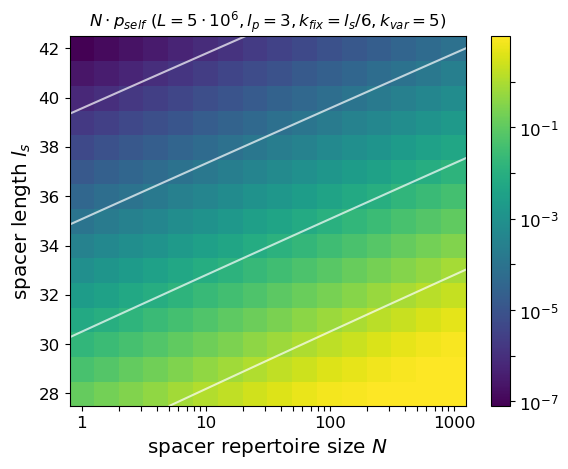

(27.5, 42.5)

In [4]:
# construct phase diagram in log10_N and l_s space
log10_N_range = collect(0:0.2:3)
l_s_range = collect(28:42)

P_grid = hcat([[1 - (1 - p_self(L,l_s+l_p,lin(l_s,m=1/6),k_var))^N for l_s in l_s_range] for N in 10.0.^log10_N_range]...)

# plot phase diagram
log10_N_range1 = vcat(log10_N_range.-0.1,3.1)
l_s_range1 = vcat(l_s_range.-0.5,42.5)

pcolor(log10_N_range1,l_s_range1,log10.(P_grid), cmap="viridis")

# set colorbar
cbar = colorbar()
cbar.ax.set_yticklabels(["","\$10^{-7}\$","","\$10^{-5}\$","","\$10^{-3}\$","","\$10^{-1}\$"],fontsize="large")

title("\$N \\cdot p_{self}\$ (\$L=5\\cdot10^6, l_p=$l_p, k_{fix}=l_s/6, k_{var}=$k_var\$)", fontsize="large")
xlabel("spacer repertoire size \$N\$", fontsize="x-large")
ylabel("spacer length \$l_s\$", fontsize="x-large")

xtick_vals = log10.(vcat(collect(1:10),collect(20:10:100),collect(200:100:1000)))
xtick_labels = string.(vcat(["1"],fill("",8),["10"],fill("",8),["100"],fill("",8),["1000"]))
xticks(xtick_vals,xtick_labels, fontsize="large")
yticks(fontsize="large")

xmin, xmax = xlim()
ymin, ymax = ylim()

# plot contours of P
for n in -7:2:-1
    plot([log10_N_pred(l_s+l_p,lin(l_s,m=1/6),k_var,L/10.0^n) for l_s in l_s_range1],
        l_s_range1, color="white", alpha=0.7)
end

xlim(xmin,xmax)
ylim(ymin,ymax)

# savefig("phasediagram.svg",format="svg")

## Fig. S2G: fit to scaling law
We fit the predicted scaling law to the best-fit straight line through datapoints belonging to different host species (see `Fig2ABC_cas.ipynb`).

Fitted parameters:
* $k_{\text{var}}$ (either constant or linearly proportional to $l_s$)
* $L/P$

Parameters held fixed:
* $L = 5 \cdot 10^6$
* $l_p = 3$
* $k_{\text{fix}} = l_s/6$

In [5]:
using DelimitedFiles, Random, Statistics

using NBInclude
@nbinclude("CRISPRCasdb.ipynb")

include("get_repertoires.jl")
include("generate_scaling_plot.jl");

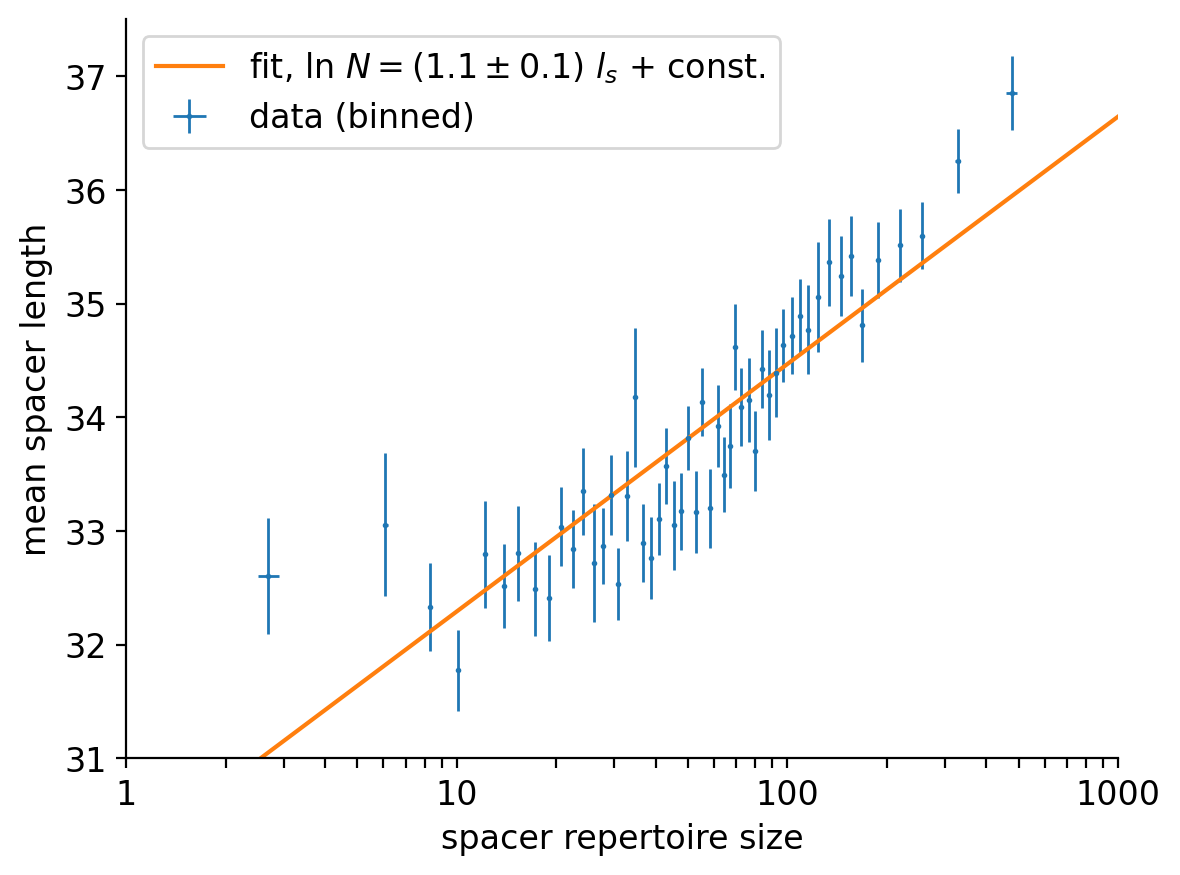

2577 repertoires returned.


In [6]:
fc = "filtered/gbs_cc_filter.csv"

gbs = shuffle(readdlm(fc,',')[:,2])

num_gbs, repsizes, spacerlens = get_repertoires(gbs)
mspacerlens = mean.(spacerlens)

rho_fit, m_fit, c_fit, dm_fit, dc_fit, propconst1, dpropconst1, inds_inbins, mean_logN_inbins, mean_l_inbins, stderr_logN_inbins, stderr_l_inbins =
    generate_scaling_plot(repsizes, mspacerlens, alldata=false,
    saveplot=false);

### Define mean-squared error between scaling law and linear fit

In [7]:
l_s_range = collect(31:36)

lin_inv(y;m=0,c=0) = (y - c)/m

MSE_scaling(m_lin, c_lin; l_p=3, m_fix=1/6, c_fix=0, m_var=0, c_var, LvP) =
    mean((lin_inv.(l_s_range,m=m_lin,c=c_lin) .-
        [log10_N_pred(l_s+l_p,lin(l_s,m=m_fix,c=c_fix),lin(l_s,m=m_var,c=c_var),LvP) for l_s in l_s_range]
        ).^2.0);

### Scan parameters to find best-fit $k_{\text{var}}$ and $L/P$
Assume $k_{\text{var}}$ constant or linearly proportional to $l_s$.

In [8]:
# constant k_var
m_var_range = collect(0:0)
c_var_range = collect(3:0.001:4)
log10_LvP_range = collect(11:0.001:11.5)
tol_0 = 3e-6

#=
# k_var linearly proportional to l_s
m_var_range = collect(0:0.0001:0.05)
c_var_range = collect(0:0)
log10_LvP_range = collect(15:0.001:17)
tol_0 = 1e-5
=#

mse_0 = tol_0
m_var_0 = 0
c_var_0 = 0
log10_LvP_0 = 0

for m_var in m_var_range, c_var in c_var_range, log10_LvP in log10_LvP_range
    mse = MSE_scaling(m_fit, c_fit,
        l_p=3, m_fix=1/6, c_fix=0, m_var=m_var, c_var=c_var, LvP=10.0.^log10_LvP)
    if mse < tol_0
        if mse < mse_0
            println("m_var = $m_var, c_var = $c_var, LvP = 10.0^$(log10_LvP): MSE = $(round(mse,sigdigits=5))")
            mse_0 = mse
            m_var_0 = m_var
            c_var_0 = c_var
            log10_LvP_0 = log10_LvP
        end
    end
end

m_var_0, c_var_0, log10_LvP_0

m_var = 0, c_var = 3.407, LvP = 10.0^11.427: MSE = 2.9898e-6
m_var = 0, c_var = 3.408, LvP = 10.0^11.426: MSE = 2.9284e-6
m_var = 0, c_var = 3.41, LvP = 10.0^11.423: MSE = 2.8818e-6
m_var = 0, c_var = 3.411, LvP = 10.0^11.422: MSE = 2.818e-6
m_var = 0, c_var = 3.413, LvP = 10.0^11.419: MSE = 2.7833e-6
m_var = 0, c_var = 3.414, LvP = 10.0^11.418: MSE = 2.7162e-6
m_var = 0, c_var = 3.416, LvP = 10.0^11.415: MSE = 2.6942e-6
m_var = 0, c_var = 3.417, LvP = 10.0^11.414: MSE = 2.6232e-6
m_var = 0, c_var = 3.419, LvP = 10.0^11.411: MSE = 2.6146e-6
m_var = 0, c_var = 3.42, LvP = 10.0^11.41: MSE = 2.5391e-6
m_var = 0, c_var = 3.423, LvP = 10.0^11.406: MSE = 2.4638e-6
m_var = 0, c_var = 3.426, LvP = 10.0^11.402: MSE = 2.3974e-6
m_var = 0, c_var = 3.429, LvP = 10.0^11.398: MSE = 2.3402e-6
m_var = 0, c_var = 3.432, LvP = 10.0^11.394: MSE = 2.2922e-6
m_var = 0, c_var = 3.435, LvP = 10.0^11.39: MSE = 2.2534e-6
m_var = 0, c_var = 3.438, LvP = 10.0^11.386: MSE = 2.2241e-6
m_var = 0, c_var = 3.441, LvP

(0, 3.447, 11.374)

### 90% confidence interval

In [9]:
param_sets = Array{Float64}[]
c_int = 0.9

for m_var in m_var_range, c_var in c_var_range, log10_LvP in log10_LvP_range
    mse = MSE_scaling(m_fit, c_fit,
        l_p=3, m_fix=1/6, c_fix=0, m_var=m_var, c_var=c_var, LvP=10.0.^log10_LvP)
    if mse*c_int < mse_0 # in confidence interval
        push!(param_sets,[m_var,c_var,log10_LvP])
    end
end

param_sets = collect(hcat(param_sets...)');

In [10]:
dm_var_0 = round(max(m_var_0 - minimum(param_sets[:,1]), maximum(param_sets[:,1]) - m_var_0),sigdigits=1)
dc_var_0 = round(max(c_var_0 - minimum(param_sets[:,2]), maximum(param_sets[:,2]) - c_var_0),sigdigits=1)
dlog10_LvP = round(max(log10_LvP_0 - minimum(param_sets[:,3]), maximum(param_sets[:,3]) - log10_LvP_0),sigdigits=1)

dm_var_0, dc_var_0, dlog10_LvP

(0.0, 0.02, 0.03)

### Plot fit to scaling law, and region corresponding to a range of parameters

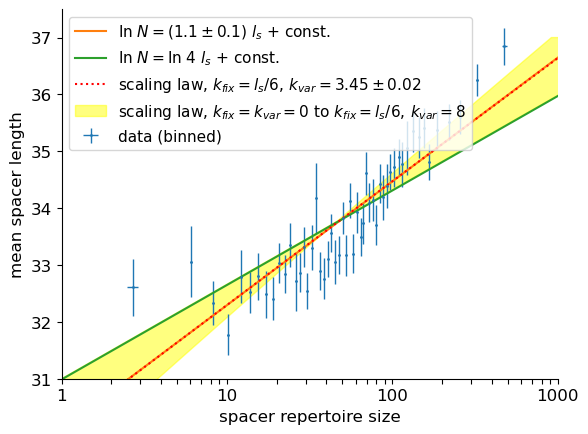

In [11]:
m_fix_1 = 0
m_var_1 = 0
c_var_1 = 0
log10_LvP_1 = 20.47

#=
m_fix_2 = 1/6
m_var_2 = 0
c_var_2 = 5
log10_LvP_2 = 9.49
=#
m_fix_2 = 1/6
m_var_2 = 0
c_var_2 = 8
log10_LvP_2 = 6.35

fig, ax = subplots()

# plot mean and standard error of binned data
errorbar(mean_logN_inbins,mean_l_inbins, linestyle="none",marker="o",markersize=1,
    xerr=stderr_logN_inbins,yerr=stderr_l_inbins, elinewidth=1,capsize=0)

# plot linear fit
xrange = collect(0:0.1:3)
plot(xrange,lin.(xrange, m=m_fit, c=c_fit))
plot(xrange,lin.(xrange, m=1/log10(4), c=c_fit+0.87))

ymin, ymax = ylim()

# plot fit to scaling law
l_s_range0 = collect(30.5:0.1:37)
plot([log10_N_pred(l_s+l_p,lin(l_s,m=1/6),lin(l_s,m=m_var_0,c=c_var_0),10.0^log10_LvP_0) for l_s in l_s_range0],
    l_s_range0,linestyle=":",color="red")

fs = 12
ylabel("mean spacer length", fontsize=fs)

xtick_vals = log10.(vcat(collect(1:10),collect(20:10:100),collect(200:100:1000)))
xtick_labels = string.(vcat(["1"],fill("",8),["10"],fill("",8),["100"],fill("",8),["1000"]))
xticks(xtick_vals, xtick_labels, fontsize=fs)

xlabel("spacer repertoire size", fontsize=fs)
xlim(0,3)
ylim(31,37.5)
yticks(31:37, fontsize=fs)
# text(2.4,30.8,"\$\\rho = $rho_fit\$", fontsize=fs)

# plot scaling law with a range of parameters
l_s_range0 = collect(30:0.1:37)
#=
# to check where line goes before putting it into fill_betweenx()
plot([log10_N_pred(l_s+l_p,lin(l_s,m=1/6),lin(l_s,c=5),10.0^9.49) for l_s in l_s_range0],
    l_s_range0,linestyle="--",color="red")
=#
fill_betweenx(l_s_range0,
    [log10_N_pred(l_s+l_p,lin(l_s,m=m_fix_1),lin(l_s,m=m_var_1,c=c_var_1),10.0^log10_LvP_1) for l_s in l_s_range0],
    [log10_N_pred(l_s+l_p,lin(l_s,m=1/6),lin(l_s,m=m_var_2,c=c_var_2),10.0^log10_LvP_2) for l_s in l_s_range0],
    color="yellow", alpha=0.5)

c_var_01 = round(c_var_0,digits=2)
legend(["\$\\ln\\,N = ($propconst1 \\pm $dpropconst1)\\ l_s\$ + const.",
        "\$\\ln\\,N = \\ln\\,4\\ l_s\$ + const.",
        "scaling law, \$k_{fix}=l_s/6,\\,k_{var}=$c_var_01 \\pm $dc_var_0\$",
        "scaling law, \$k_{fix}=k_{var}=0\$ to \$k_{fix}=l_s/6,\\,k_{var}=8\$",
        "data (binned)"], fontsize=fs-1, loc="upper left")

ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)

# savefig("fit_model.svg",format="svg")